In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv(r"D:\dataset\NewspaperData.csv")

In [6]:
df = df[['daily', 'sunday']]

In [7]:
df.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [8]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

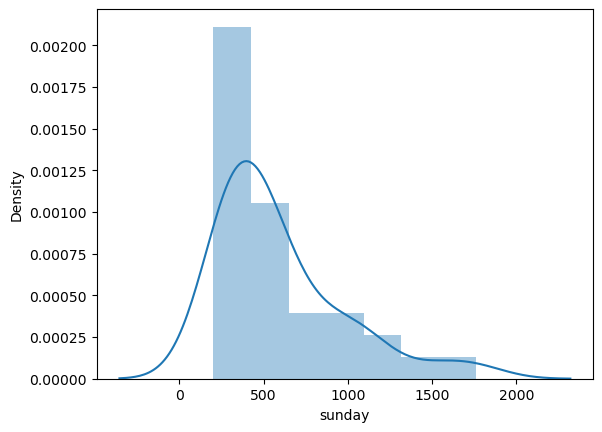

In [9]:
sns.distplot(df['sunday'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

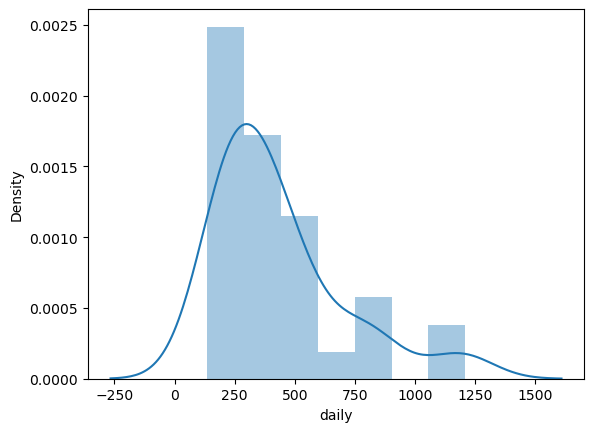

In [10]:
sns.distplot(df['daily'])

In [11]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

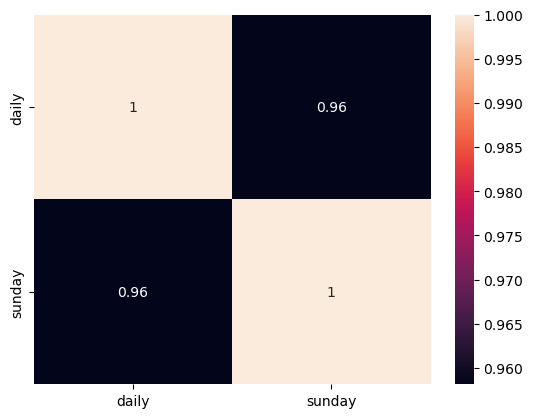

In [12]:
sns.heatmap(df.corr(), annot= True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily', ylabel='sunday'>

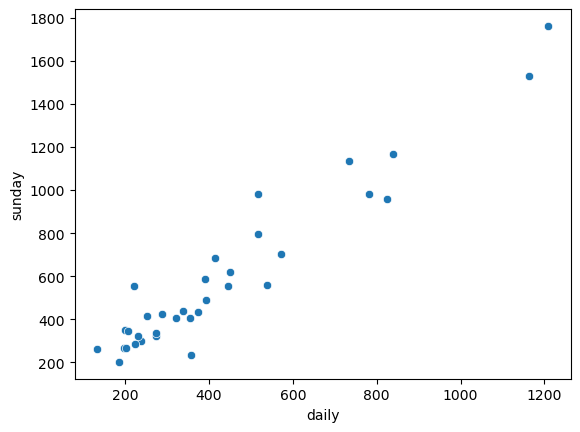

In [14]:
sns.scatterplot(df['daily'], df['sunday'])

In [15]:
import statsmodels.formula.api as smf

In [16]:
#Train the data

In [19]:
model = smf.ols('sunday~daily', data=df).fit()

In [22]:
model

In [23]:
# Regression plot

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily', ylabel='sunday'>

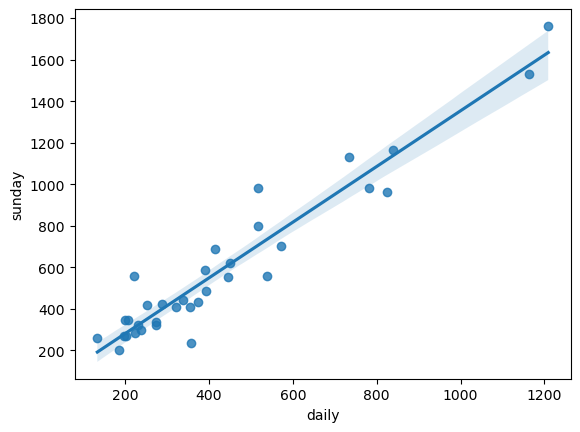

In [24]:
sns.regplot(df['daily'],df['sunday'])

In [25]:
#model parameters

In [26]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [27]:
#print values for t value and p value

In [28]:
print(model.tvalues, model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [29]:
#r^2 value

In [30]:
print(model.rsquared, model.rsquared_adj)

0.9180596895873295 0.9154990548869336


# Prediction of new data

In [31]:
newdata = pd.Series([200, 500, 800])
newdata = pd.DataFrame(newdata, columns=['daily'])

In [32]:
newdata

,daily
0,200
1,500
2,800


In [33]:
model.predict(newdata)

0     281.778581
1     683.693009
2    1085.607436
dtype: float64

# WT_AT

In [35]:
df1= pd.read_csv(r"D:\dataset\WC_AT.csv")

In [37]:
df1.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [39]:
model = smf.ols('AT~Waist', data=df1).fit()

In [45]:
newdata = pd.Series([45, 85, 95])
newdata = pd.DataFrame(newdata, columns=['Waist'])

In [44]:
newdata

,Waist
0,200
1,85
2,95


In [46]:
model.predict(newdata)

0    -60.332815
1     78.021560
2    112.610154
dtype: float64